<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#COMP30024-Artificial-Intelligence-Project-1-Report" data-toc-modified-id="COMP30024-Artificial-Intelligence-Project-1-Report-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>COMP30024 Artificial Intelligence Project 1 Report</a></span><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>import</a></span></li><li><span><a href="#new-analysis" data-toc-modified-id="new-analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>new analysis</a></span><ul class="toc-item"><li><span><a href="#generate-all-test-case" data-toc-modified-id="generate-all-test-case-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>generate all test case</a></span></li><li><span><a href="#store-output" data-toc-modified-id="store-output-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>store output</a></span></li><li><span><a href="#draw-graph" data-toc-modified-id="draw-graph-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>draw graph</a></span></li></ul></li></ul></li></ul></div>

# COMP30024 Artificial Intelligence Project 1 Report

## import

In [1]:
import pandas as pd
import numpy as np
import glob
import os
import timeit
from subprocess import call
import subprocess
import json
import matplotlib.pyplot as plt
from math import log

## new analysis

In [2]:
# root = 'C:\\Users\\53421\\PycharmProjects\\ai-project\\project1'
# root = "e://backup/code/python/ai-project/project1"
# os.chdir(root)

### generate all test case

### store output

DataFrame: #piece, #block, avg b, d, relative error, runtime, space

time python data.py

In [3]:
summary = pd.read_csv("out.csv", sep=',', index_col=False)
summary_clean = summary.drop(summary.columns[0], axis=1)

In [4]:
summary_clean[summary_clean["runtime(in ms)"] >= 30 * 1000]

# summary.sample(10)

,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name


In [5]:
summary.head(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
0,0,1.0,0.0,1.800000,5.0,2.0,371.2851,8053.0,87.2728,./fullTestCase/1p/0b0.json
1,1,1.0,0.0,2.000000,3.0,1.0,115.8226,8053.0,69.4479,./fullTestCase/1p/0b1.json
2,2,1.0,0.0,1.000000,1.0,0.0,111.4761,8053.0,78.6876,./fullTestCase/1p/0b2.json
3,3,1.0,0.0,1.714286,4.0,1.0,113.7506,8053.0,70.1069,./fullTestCase/1p/0b3.json
4,4,1.0,0.0,1.857143,3.0,1.0,112.5679,8053.0,72.2862,./fullTestCase/1p/0b4.json
5,5,1.0,0.0,2.250000,3.0,1.0,126.8821,8053.0,73.8211,./fullTestCase/1p/0b5.json
6,6,1.0,0.0,1.727273,4.0,1.0,112.8064,8053.0,71.0153,./fullTestCase/1p/0b6.json
7,7,1.0,0.0,1.818182,4.0,1.0,116.5053,8053.0,85.6861,./fullTestCase/1p/0b7.json
8,8,1.0,0.0,1.346154,7.0,3.0,133.2733,8053.0,71.2407,./fullTestCase/1p/0b8.json
9,9,1.0,0.0,1.000000,1.0,0.0,111.9524,8053.0,70.9533,./fullTestCase/1p/0b9.json


In [6]:
summary.tail(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
3125,3125,4.0,29.0,1.800000,8.0,0.0,115.4890,8053.0,68.0830,./fullTestCase/4p/29b5.json
3126,3126,4.0,29.0,1.550000,7.0,0.0,116.5173,8053.0,67.7394,./fullTestCase/4p/29b9.json
3127,3127,4.0,29.0,1.500000,9.0,0.0,126.2049,8053.0,77.1020,./fullTestCase/4p/29b24.json
3128,3128,4.0,30.0,1.689655,11.0,0.0,119.8519,8053.0,68.5581,./fullTestCase/4p/30b7.json
3129,3129,4.0,30.0,1.125000,8.0,0.0,112.1712,8053.0,70.1951,./fullTestCase/4p/30b20.json
3130,3130,4.0,30.0,1.935484,10.0,0.0,129.1460,8053.0,72.5265,./fullTestCase/4p/30b26.json
3131,3131,4.0,31.0,1.533333,7.0,0.0,121.3839,8053.0,67.5287,./fullTestCase/4p/31b10.json
3132,3132,4.0,31.0,1.391304,12.0,0.0,115.7030,8053.0,70.0708,./fullTestCase/4p/31b24.json
3133,3133,4.0,31.0,1.333333,9.0,0.0,118.3061,8053.0,71.0868,./fullTestCase/4p/31b25.json
3134,3134,4.0,32.0,1.000000,10.0,0.0,111.2730,8053.0,82.5462,./fullTestCase/4p/32b9.json


### draw graph

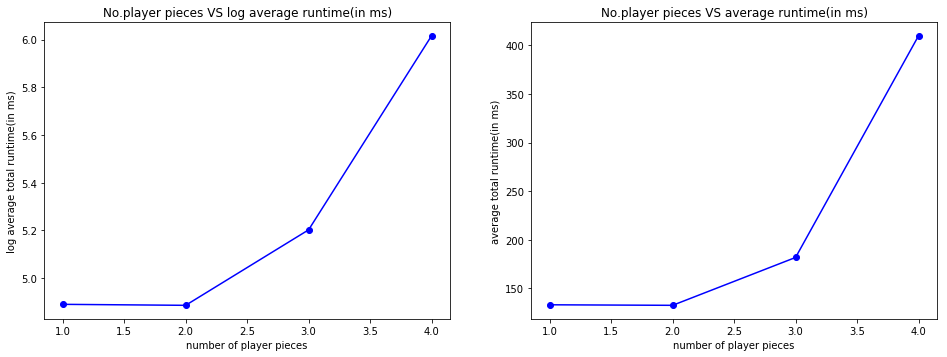

In [25]:
grouped = summary.groupby('number of pieces')
p_runtime = []
p_preprocess_time = []
p_execution_time = []
players = []
for i, group in grouped:
    players.append(i)
    p_runtime.append(group['runtime(in ms)'].mean())
    p_preprocess_time.append(group['preprocess time(in ms)'].mean())
    p_execution_time.append(p_runtime[len(p_runtime) - 1] - p_preprocess_time[len(p_preprocess_time) - 1])

log_p_runtime = list(map(log, p_runtime))

plt.figure(figsize = [16, 12])

plt.subplot(2, 2, 1)
plt.plot(players, log_p_runtime, "bo-")
plt.title("No.player pieces VS log average runtime(in ms)")
plt.xlabel("number of player pieces")
plt.ylabel("log average total runtime(in ms)")

plt.savefig("player.png", bbox_inches = 'tight')

plt.subplot(2, 2, 2)
plt.plot(players, p_runtime, "bo-")
plt.title("No.player pieces VS average runtime(in ms)")
plt.xlabel("number of player pieces")
plt.ylabel("average total runtime(in ms)")

plt.show()

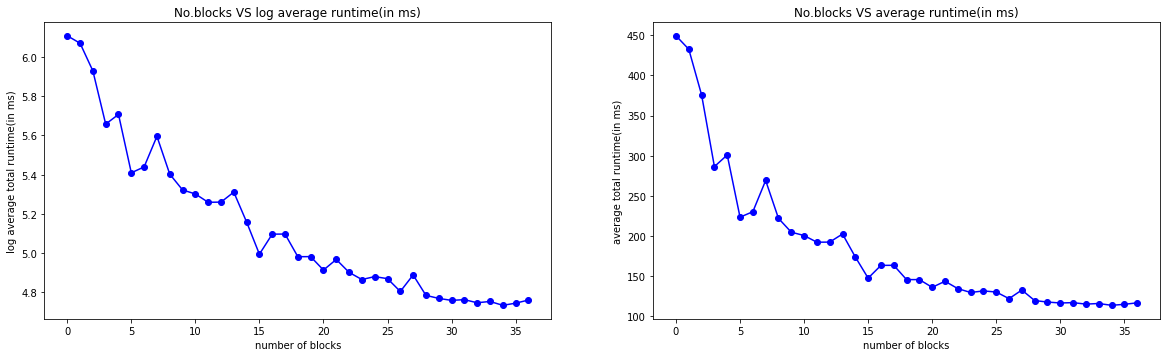

In [22]:
grouped = summary.groupby('number of blocks')
b_runtime = []
b_preprocess_time = []
b_execution_time = []
blocks = []
for i, group in grouped:
    blocks.append(i)
    b_runtime.append(group['runtime(in ms)'].mean())
    b_preprocess_time.append(group['preprocess time(in ms)'].mean())
    b_execution_time.append(b_runtime[len(b_runtime) - 1] - b_preprocess_time[len(b_preprocess_time) - 1])


log_b_runtime = list(map(log, b_runtime))

plt.figure(figsize = [20, 12])

plt.subplot(2, 2, 1)
# plt.plot(blocks, b_runtime, "bo-")
plt.plot(blocks, log_b_runtime, "bo-")
plt.title("No.blocks VS log average runtime(in ms)")
plt.xlabel("number of blocks")
plt.ylabel("log average total runtime(in ms)")

plt.savefig("block.png", bbox_inches = 'tight')

plt.subplot(2, 2, 2)
plt.plot(blocks, b_runtime, "bo-")
plt.title("No.blocks VS average runtime(in ms)")
plt.xlabel("number of blocks")
plt.ylabel("average total runtime(in ms)")

plt.show()

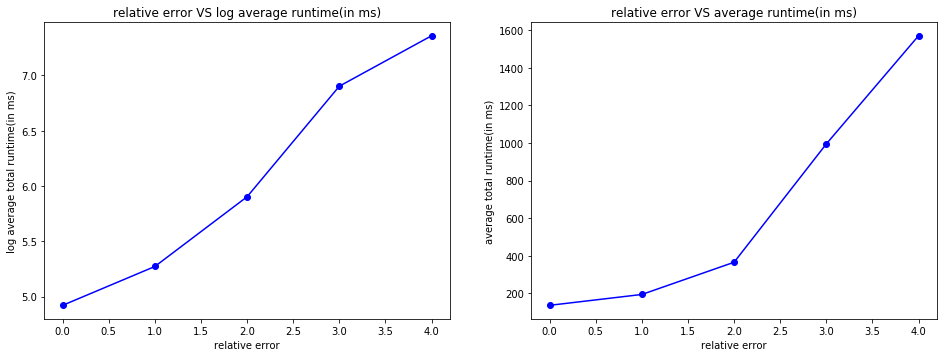

In [21]:
grouped = summary.groupby('relative error')
r_runtime = []
r_preprocess_time = []
r_execution_time = []
error = []
for i, group in grouped:
    error.append(i)
    r_runtime.append(group['runtime(in ms)'].mean())
    r_preprocess_time.append(group['preprocess time(in ms)'].mean())
    r_execution_time.append(r_runtime[len(r_runtime) - 1] - r_preprocess_time[len(r_preprocess_time) - 1])

log_r_runtime = list(map(log, r_runtime))
    
plt.figure(figsize = [16, 12])

plt.subplot(2, 2, 1)
plt.plot(error, log_r_runtime, "bo-")
plt.title("relative error VS log average runtime(in ms)")
plt.xlabel("relative error")
plt.ylabel("log average total runtime(in ms)")

plt.savefig("relative error.png", bbox_inches = 'tight')

plt.subplot(2, 2, 2)
plt.plot(error, r_runtime, "bo-")
plt.title("relative error VS average runtime(in ms)")
plt.xlabel("relative error")
plt.ylabel("average total runtime(in ms)")

plt.show()

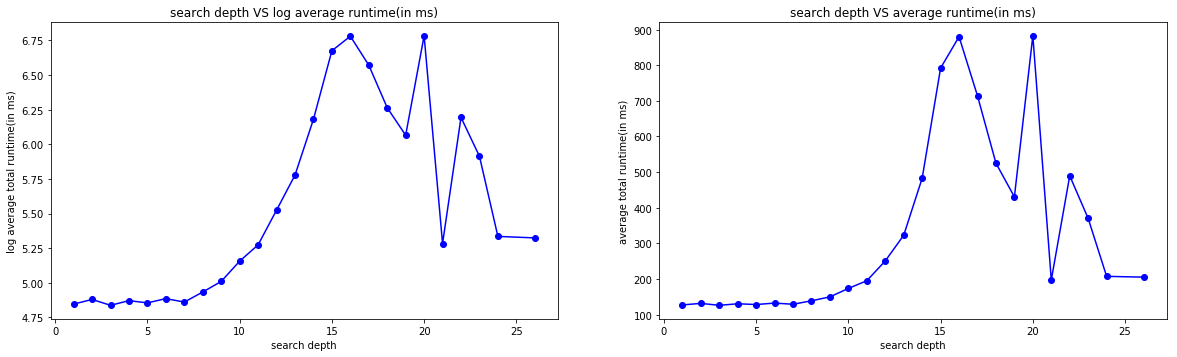

In [20]:
grouped = summary.groupby('depth of search tree')
d_runtime = []
d_preprocess_time = []
d_execution_time = []
depth = []
for i, group in grouped:
    depth.append(i)
    d_runtime.append(group['runtime(in ms)'].mean())
    d_preprocess_time.append(group['preprocess time(in ms)'].mean())
    d_execution_time.append(d_runtime[len(d_runtime) - 1] - d_preprocess_time[len(d_preprocess_time) - 1])

log_d_runtime = list(map(log, d_runtime))
    
plt.figure(figsize = [20, 12])

plt.subplot(2, 2, 1)
plt.plot(depth, log_d_runtime, "bo-")
plt.title("search depth VS log average runtime(in ms)")
plt.xlabel("search depth")
plt.ylabel("log average total runtime(in ms)")

plt.savefig("depth.png", bbox_inches = 'tight')

plt.subplot(2, 2, 2)
plt.plot(depth, d_runtime, "bo-")
plt.title("search depth VS average runtime(in ms)")
plt.xlabel("search depth")
plt.ylabel("average total runtime(in ms)")

plt.show()

In [22]:
# summary[summary['depth of search tree'] == 18]

In [11]:
### draw branching factor VS runtime
# method 1: ceil all branching factors and groupby as usual
from copy import deepcopy
from math import ceil

temp = deepcopy(summary)
temp['average branching factor'] = temp['average branching factor'].apply(lambda x: ceil(x))
temp.head(10)

,Unnamed: 0,number of pieces,number of blocks,average branching factor,depth of search tree,relative error,runtime(in ms),space used(in MB),preprocess time(in ms),file name
0,0,1.0,0.0,2,5.0,2.0,371.2851,8053.0,87.2728,./fullTestCase/1p/0b0.json
1,1,1.0,0.0,2,3.0,1.0,115.8226,8053.0,69.4479,./fullTestCase/1p/0b1.json
2,2,1.0,0.0,1,1.0,0.0,111.4761,8053.0,78.6876,./fullTestCase/1p/0b2.json
3,3,1.0,0.0,2,4.0,1.0,113.7506,8053.0,70.1069,./fullTestCase/1p/0b3.json
4,4,1.0,0.0,2,3.0,1.0,112.5679,8053.0,72.2862,./fullTestCase/1p/0b4.json
5,5,1.0,0.0,3,3.0,1.0,126.8821,8053.0,73.8211,./fullTestCase/1p/0b5.json
6,6,1.0,0.0,2,4.0,1.0,112.8064,8053.0,71.0153,./fullTestCase/1p/0b6.json
7,7,1.0,0.0,2,4.0,1.0,116.5053,8053.0,85.6861,./fullTestCase/1p/0b7.json
8,8,1.0,0.0,2,7.0,3.0,133.2733,8053.0,71.2407,./fullTestCase/1p/0b8.json
9,9,1.0,0.0,1,1.0,0.0,111.9524,8053.0,70.9533,./fullTestCase/1p/0b9.json


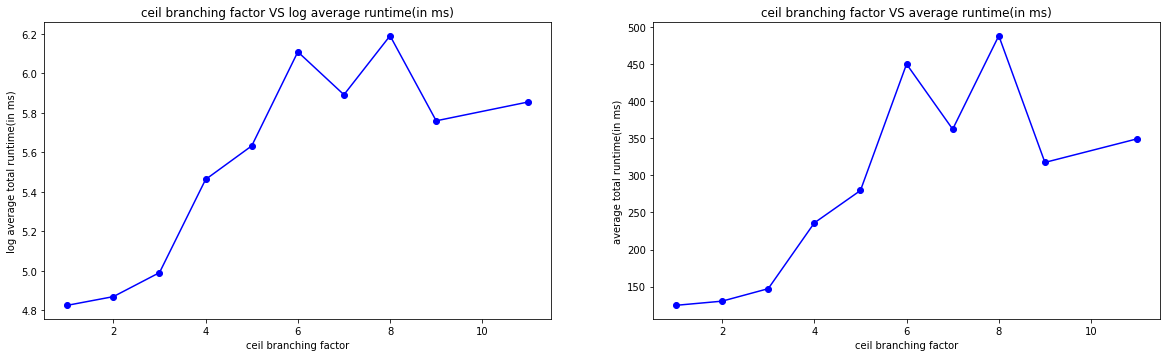

In [19]:
grouped = temp.groupby('average branching factor')
f_runtime = []
branching_factor = []
for i, group in grouped:
    branching_factor.append(i)
    f_runtime.append(group['runtime(in ms)'].mean())

log_f_runtime = list(map(log, f_runtime))
    
plt.figure(figsize = [20, 12])

plt.subplot(2, 2, 1)
plt.plot(branching_factor, log_f_runtime, "bo-")
plt.title("ceil branching factor VS log average runtime(in ms)")
plt.xlabel("ceil branching factor")
plt.ylabel("log average total runtime(in ms)")

plt.savefig("branching factor.png", bbox_inches = 'tight')

plt.subplot(2, 2, 2)
plt.plot(branching_factor, f_runtime, "bo-")
plt.title("ceil branching factor VS average runtime(in ms)")
plt.xlabel("ceil branching factor")
plt.ylabel("average total runtime(in ms)")

plt.show()

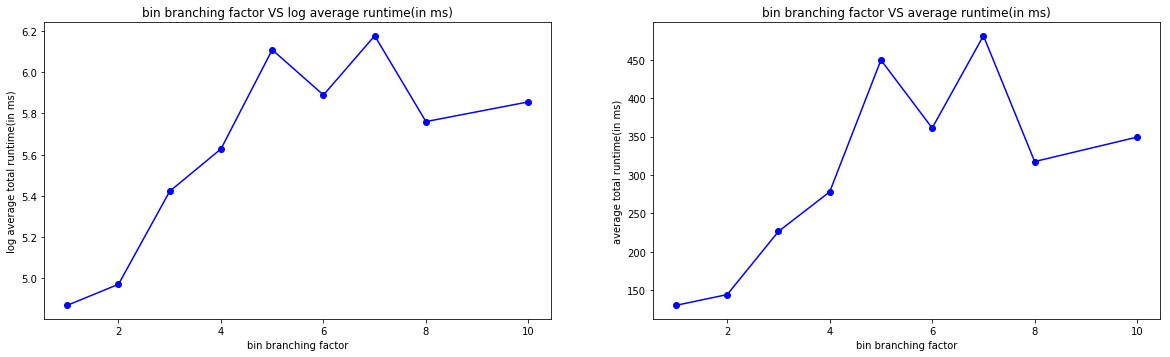

In [13]:
# method 2: bins branching factors
temp2 = deepcopy(summary)
temp2.sort_values(by = "average branching factor", ascending = False).head(20)

bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

# digitize returns the index of bin an item belongs to
# default right = false --> bin 1 for x in [1, 2), bin 2 for x in [2, 3)
bin_belong = np.digitize(temp2['average branching factor'], bins)
temp2["bin_belong"] = pd.Series(bin_belong)

grouped = temp2.groupby("bin_belong")
ff_runtime = []
branching_ffactor = []
for i, group in grouped:
    branching_ffactor.append(i)
    ff_runtime.append(group['runtime(in ms)'].mean())

log_ff_runtime = list(map(log, ff_runtime))
    
plt.figure(figsize = [20, 12])

plt.subplot(2, 2, 1)
plt.plot(branching_ffactor, log_ff_runtime, "bo-")
plt.title("bin branching factor VS log average runtime(in ms)")
plt.xlabel("bin branching factor")
plt.ylabel("log average total runtime(in ms)")

plt.subplot(2, 2, 2)
plt.plot(branching_ffactor, ff_runtime, "bo-")
plt.title("bin branching factor VS average runtime(in ms)")
plt.xlabel("bin branching factor")
plt.ylabel("average total runtime(in ms)")

plt.show()